#      BOOK: Linear Algebra: Theory, Intuition, Code
####     AUTHOR: Mike X Cohen
####    WEBSITE: sincxpress.com

##    CHAPTER: Principal components analysis (chapter 19)

In [1]:
## import libraries for the entire chapter
import numpy as np
import matplotlib.pyplot as plt

### Section 19.7, code block 19.1

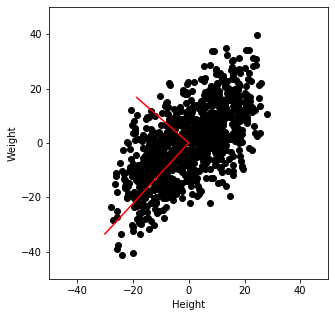

In [2]:

# create data
N = 1000
h = np.linspace(150,190,N) + np.random.randn(N)*5
w = h*.7 - 50 + np.random.randn(N)*10

# covariance
X = np.vstack((h,w)).T
X = X-np.mean(X,axis=0)
C = X.T@X / (len(h)-1)

# PCA
eigvals,V = np.linalg.eig(C)
i = np.argsort(eigvals)[::-1]
V = V[:,i]
eigvals = eigvals[i]
eigvals = 100*eigvals/np.sum(eigvals)
scores = X@V # not used, but useful code

# plot data with PCs
fig = plt.figure(figsize=(5,5))
plt.plot(X[:,0],X[:,1],'ko')
plt.plot([0,V[0,0]*45],[0,V[1,0]*45],'r')
plt.plot([0,V[0,1]*25],[0,V[1,1]*25],'r')
plt.xlabel('Height'), plt.ylabel('Weight')
plt.axis([-50,50,-50,50])
plt.show()

### Section 19.7, code block 19.3

In [3]:
# re-mean-center
X = X-np.mean(X,axis=0)

# SVD
U,s,Vv = np.linalg.svd(X) # Vv == V
scores = X@Vv.T

# convert to percent variance
s = s**2 / (len(X)-1)
s = 100*s/sum(s) # s == eigvals